In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os


Found 2756 images belonging to 2 classes.
Found 688 images belonging to 2 classes.


## Loading Data

In [ ]:
dataset_dir = r"E:\datasets\aivsreal\data_source\data_source"  
img_width, img_height = 150, 150
batch_size = 32
epochs =5



In [ ]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split dataset into training and validation (80% train, 20% validation)
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


## Model Building

In [25]:
model = models.Sequential()

# Convolutional Layer + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Adding more convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the 3D output to 1D feature vectors
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model Summary
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [26]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the model
model.save('image_classifier_model.h5')


Epoch 1/5
86/86 [==============================] - 49s 556ms/step - loss: 0.3349 - accuracy: 0.8348 - val_loss: 0.0789 - val_accuracy: 0.9747
Epoch 2/5
86/86 [==============================] - 36s 417ms/step - loss: 0.0781 - accuracy: 0.9739 - val_loss: 0.0424 - val_accuracy: 0.9821
Epoch 3/5
86/86 [==============================] - 36s 413ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0343 - val_accuracy: 0.9851
Epoch 4/5
86/86 [==============================] - 36s 419ms/step - loss: 0.0558 - accuracy: 0.9820 - val_loss: 0.0562 - val_accuracy: 0.9836
Epoch 5/5
86/86 [==============================] - 36s 421ms/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0326 - val_accuracy: 0.9896


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluating Model

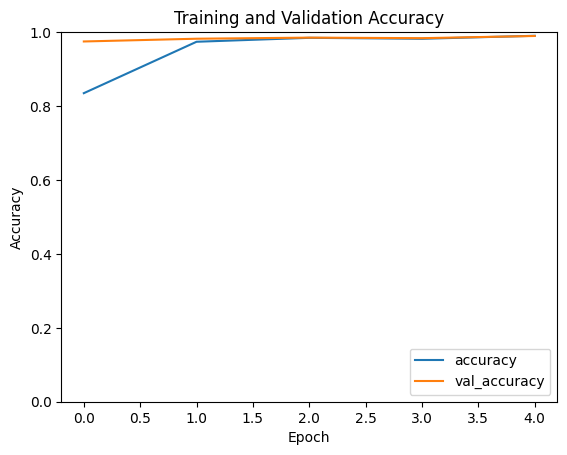

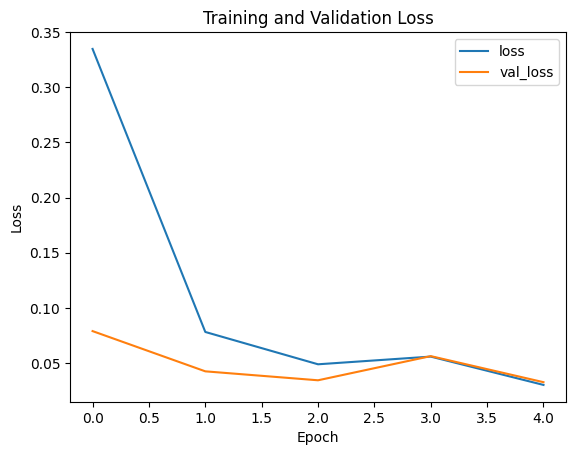

In [27]:

import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Inference

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np


model = tf.keras.models.load_model('image_classifier_model.h5')


image_path = r'C:\Users\acer\Desktop\test\test6.jpg' 
img_width, img_height = 150, 150
img = image.load_img(image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  

prediction = model.predict(img_array)

if prediction[0] > 0.5:
    print("Predicted: Real")
else:
    print("Predicted: AI generated")


1/1 [==============================] - 0s 78ms/step
Predicted: Real
